In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import scipy.stats as stats
from scipy.stats import ttest_1samp, ttest_ind

## Problem 1:

In [2]:
df= pd.read_csv("Wholesale+Customers+Data.csv",index_col=0)
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Buyer/Spender,,,,,,,,
1,Retail,Other,12669,9656,7561,214,2674,1338
2,Retail,Other,7057,9810,9568,1762,3293,1776
3,Retail,Other,6353,8808,7684,2405,3516,7844
4,Hotel,Other,13265,1196,4221,6404,507,1788
5,Retail,Other,22615,5410,7198,3915,1777,5185


In [3]:
df["Total_Spending"]=df["Fresh"]+df["Milk"]+df["Grocery"]+df["Frozen"]+df['Detergents_Paper']+df["Delicatessen"]
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total_Spending
Buyer/Spender,,,,,,,,,
1,Retail,Other,12669,9656,7561,214,2674,1338,34112
2,Retail,Other,7057,9810,9568,1762,3293,1776,33266
3,Retail,Other,6353,8808,7684,2405,3516,7844,36610
4,Hotel,Other,13265,1196,4221,6404,507,1788,27381
5,Retail,Other,22615,5410,7198,3915,1777,5185,46100


In [4]:
sum= df.sum(numeric_only=True)
sum

Fresh                5280131
Milk                 2550357
Grocery              3498562
Frozen               1351650
Detergents_Paper     1267857
Delicatessen          670943
Total_Spending      14619500
dtype: int64

# 1.1 Use methods of descriptive statistics to summarize data. Which Region and which Channel seems to spend more? Which Region and which Channel seems to spend less?

In [5]:
x=df.groupby(["Region"])["Total_Spending"].sum()
x

Region
Lisbon     2386813
Oporto     1555088
Other     10677599
Name: Total_Spending, dtype: int64

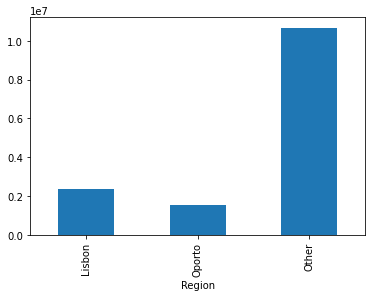

In [6]:
x.plot(kind="bar");

In [7]:
print("Other spends the most with a total spending of 10677599 and Opporto spends the least with a total spending of 1555088")

Other spends the most with a total spending of 10677599 and Opporto spends the least with a total spending of 1555088


In [8]:
df.groupby(["Region"])["Total_Spending"].describe()

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
Lisbon,77.0,30997.571429,20321.813773,4925.0,17184.00,25385.0,38699.00,107155.0
Oporto,47.0,33086.978723,24234.507325,4129.0,20611.50,26953.0,36158.50,130877.0
Other,316.0,33789.870253,27949.337752,904.0,17209.25,28029.0,42492.25,199891.0


In [9]:
y=df.groupby(["Channel"])["Total_Spending"].sum()
y

Channel
Hotel     7999569
Retail    6619931
Name: Total_Spending, dtype: int64

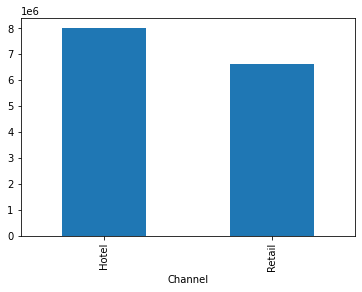

In [10]:
y.plot(kind="bar");

In [11]:
print("Hotel spending is the most with a total spending of 7999569 and Retail is the least with a total spending of 6619931")

Hotel spending is the most with a total spending of 7999569 and Retail is the least with a total spending of 6619931


In [12]:
df.groupby(["Channel"])["Total_Spending"].describe()

,count,mean,std,min,25%,50%,75%,max
Channel,,,,,,,,
Hotel,298.0,26844.191275,22164.839073,904.0,13859.25,21254.5,32113.75,190169.0
Retail,142.0,46619.232394,29346.866491,14993.0,30147.25,37139.0,51650.50,199891.0


# 1.2 There are 6 different varieties of items are considered. Do all varieties show similar behaviour across Region and Channel?

In [13]:
df.groupby("Region").describe().T

Region                         Lisbon         Oporto          Other
Fresh            count      77.000000      47.000000     316.000000
                 mean    11101.727273    9887.680851   12533.471519
                 std     11557.438575    8387.899211   13389.213115
                 min        18.000000       3.000000       3.000000
                 25%      2806.000000    2751.500000    3350.750000
                 50%      7363.000000    8090.000000    8752.500000
                 75%     15218.000000   14925.500000   17406.500000
                 max     56083.000000   32717.000000  112151.000000
Milk             count      77.000000      47.000000     316.000000
                 mean     5486.415584    5088.170213    5977.085443
                 std      5704.856079    5826.343145    7935.463443
                 min       258.000000     333.000000      55.000000
                 25%      1372.000000    1430.500000    1634.000000
                 50%      3748.000000    2374.000000    3684.500000
                 75%      7503.000000    5772.500000    7198.750000
                 max     28326.000000   25071.000000   73498.000000
Grocery          count      77.000000      47.000000     316.000000
                 mean     7403.077922    9218.595745    7896.363924
                 std      8496.287728   10842.745314    9537.287778
                 min       489.000000    1330.000000       3.000000
                 25%      2046.000000    2792.500000    2141.500000
                 50%      3838.000000    6114.000000    4732.000000
                 75%      9490.000000   11758.500000   10559.750000
                 max     39694.000000   67298.000000   92780.000000
Frozen           count      77.000000      47.000000     316.000000
                 mean     3000.337662    4045.361702    2944.594937
                 std      3092.143894    9151.784954    4260.126243
                 min        61.000000     131.000000      25.000000
                 25%       950.000000     811.500000     664.750000
                 50%      1801.000000    1455.000000    1498.000000
                 75%      4324.000000    3272.000000    3354.750000
                 max     18711.000000   60869.000000   36534.000000
Detergents_Paper count      77.000000      47.000000     316.000000
                 mean     2651.116883    3687.468085    2817.753165
                 std      4208.462708    6514.717668    4593.051613
                 min         5.000000      15.000000       3.000000
                 25%       284.000000     282.500000     251.250000
                 50%       737.000000     811.000000     856.000000
                 75%      3593.000000    4324.500000    3875.750000
                 max     19410.000000   38102.000000   40827.000000
Delicatessen     count      77.000000      47.000000     316.000000
                 mean     1354.896104    1159.702128    1620.601266
                 std      1345.423340    1050.739841    3232.581660
                 min         7.000000      51.000000       3.000000
                 25%       548.000000     540.500000     402.000000
                 50%       806.000000     898.000000     994.000000
                 75%      1775.000000    1538.500000    1832.750000
                 max      6854.000000    5609.000000   47943.000000
Total_Spending   count      77.000000      47.000000     316.000000
                 mean    30997.571429   33086.978723   33789.870253
                 std     20321.813773   24234.507325   27949.337752
                 min      4925.000000    4129.000000     904.000000
                 25%     17184.000000   20611.500000   17209.250000
                 50%     25385.000000   26953.000000   28029.000000
                 75%     38699.000000   36158.500000   42492.250000
                 max    107155.000000  130877.000000  199891.000000

In [14]:
print ("Apart from Fresh and Delicatessen, all items exhibit minimum variance in Lisbon, while maximum variability differs for most items")

Apart from Fresh and Delicatessen, all items exhibit minimum variance in Lisbon, while maximum variability differs for most items


In [15]:
df.groupby("Channel").describe().T

Channel                         Hotel         Retail
Fresh            count     298.000000     142.000000
                 mean    13475.560403    8904.323944
                 std     13831.687502    8987.714750
                 min         3.000000      18.000000
                 25%      4070.250000    2347.750000
                 50%      9581.500000    5993.500000
                 75%     18274.750000   12229.750000
                 max    112151.000000   44466.000000
Milk             count     298.000000     142.000000
                 mean     3451.724832   10716.500000
                 std      4352.165571    9679.631351
                 min        55.000000     928.000000
                 25%      1164.500000    5938.000000
                 50%      2157.000000    7812.000000
                 75%      4029.500000   12162.750000
                 max     43950.000000   73498.000000
Grocery          count     298.000000     142.000000
                 mean     3962.137584   16322.852113
                 std      3545.513391   12267.318094
                 min         3.000000    2743.000000
                 25%      1703.750000    9245.250000
                 50%      2684.000000   12390.000000
                 75%      5076.750000   20183.500000
                 max     21042.000000   92780.000000
Frozen           count     298.000000     142.000000
                 mean     3748.251678    1652.612676
                 std      5643.912500    1812.803662
                 min        25.000000      33.000000
                 25%       830.000000     534.250000
                 50%      2057.500000    1081.000000
                 75%      4558.750000    2146.750000
                 max     60869.000000   11559.000000
Detergents_Paper count     298.000000     142.000000
                 mean      790.560403    7269.507042
                 std      1104.093673    6291.089697
                 min         3.000000     332.000000
                 25%       183.250000    3683.500000
                 50%       385.500000    5614.500000
                 75%       899.500000    8662.500000
                 max      6907.000000   40827.000000
Delicatessen     count     298.000000     142.000000
                 mean     1415.956376    1753.436620
                 std      3147.426922    1953.797047
                 min         3.000000       3.000000
                 25%       379.000000     566.750000
                 50%       821.000000    1350.000000
                 75%      1548.000000    2156.000000
                 max     47943.000000   16523.000000
Total_Spending   count     298.000000     142.000000
                 mean    26844.191275   46619.232394
                 std     22164.839073   29346.866491
                 min       904.000000   14993.000000
                 25%     13859.250000   30147.250000
                 50%     21254.500000   37139.000000
                 75%     32113.750000   51650.500000
                 max    190169.000000  199891.000000

In [16]:
print ("In most cases standard deviation is most in the Retail channel, behaviour differs across channels")

In most cases standard deviation is most in the Retail channel, behaviour differs across channels


## 1.3 On the basis of descriptive measure of variability, which item shows the most inconsistent behavior? Which items show the least inconsistent behaviour?



In [17]:
df.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total_Spending
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455,33226.136364
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937,26356.301730
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000,904.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000,17448.750000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000,27492.000000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000,41307.500000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000,199891.000000


In [18]:
print("In terms of variability Fresh items show most inconsistency, while Delicatessen items show least inconsistency")

In terms of variability Fresh items show most inconsistency, while Delicatessen items show least inconsistency


## 1.4 Are there any outliers in the data?

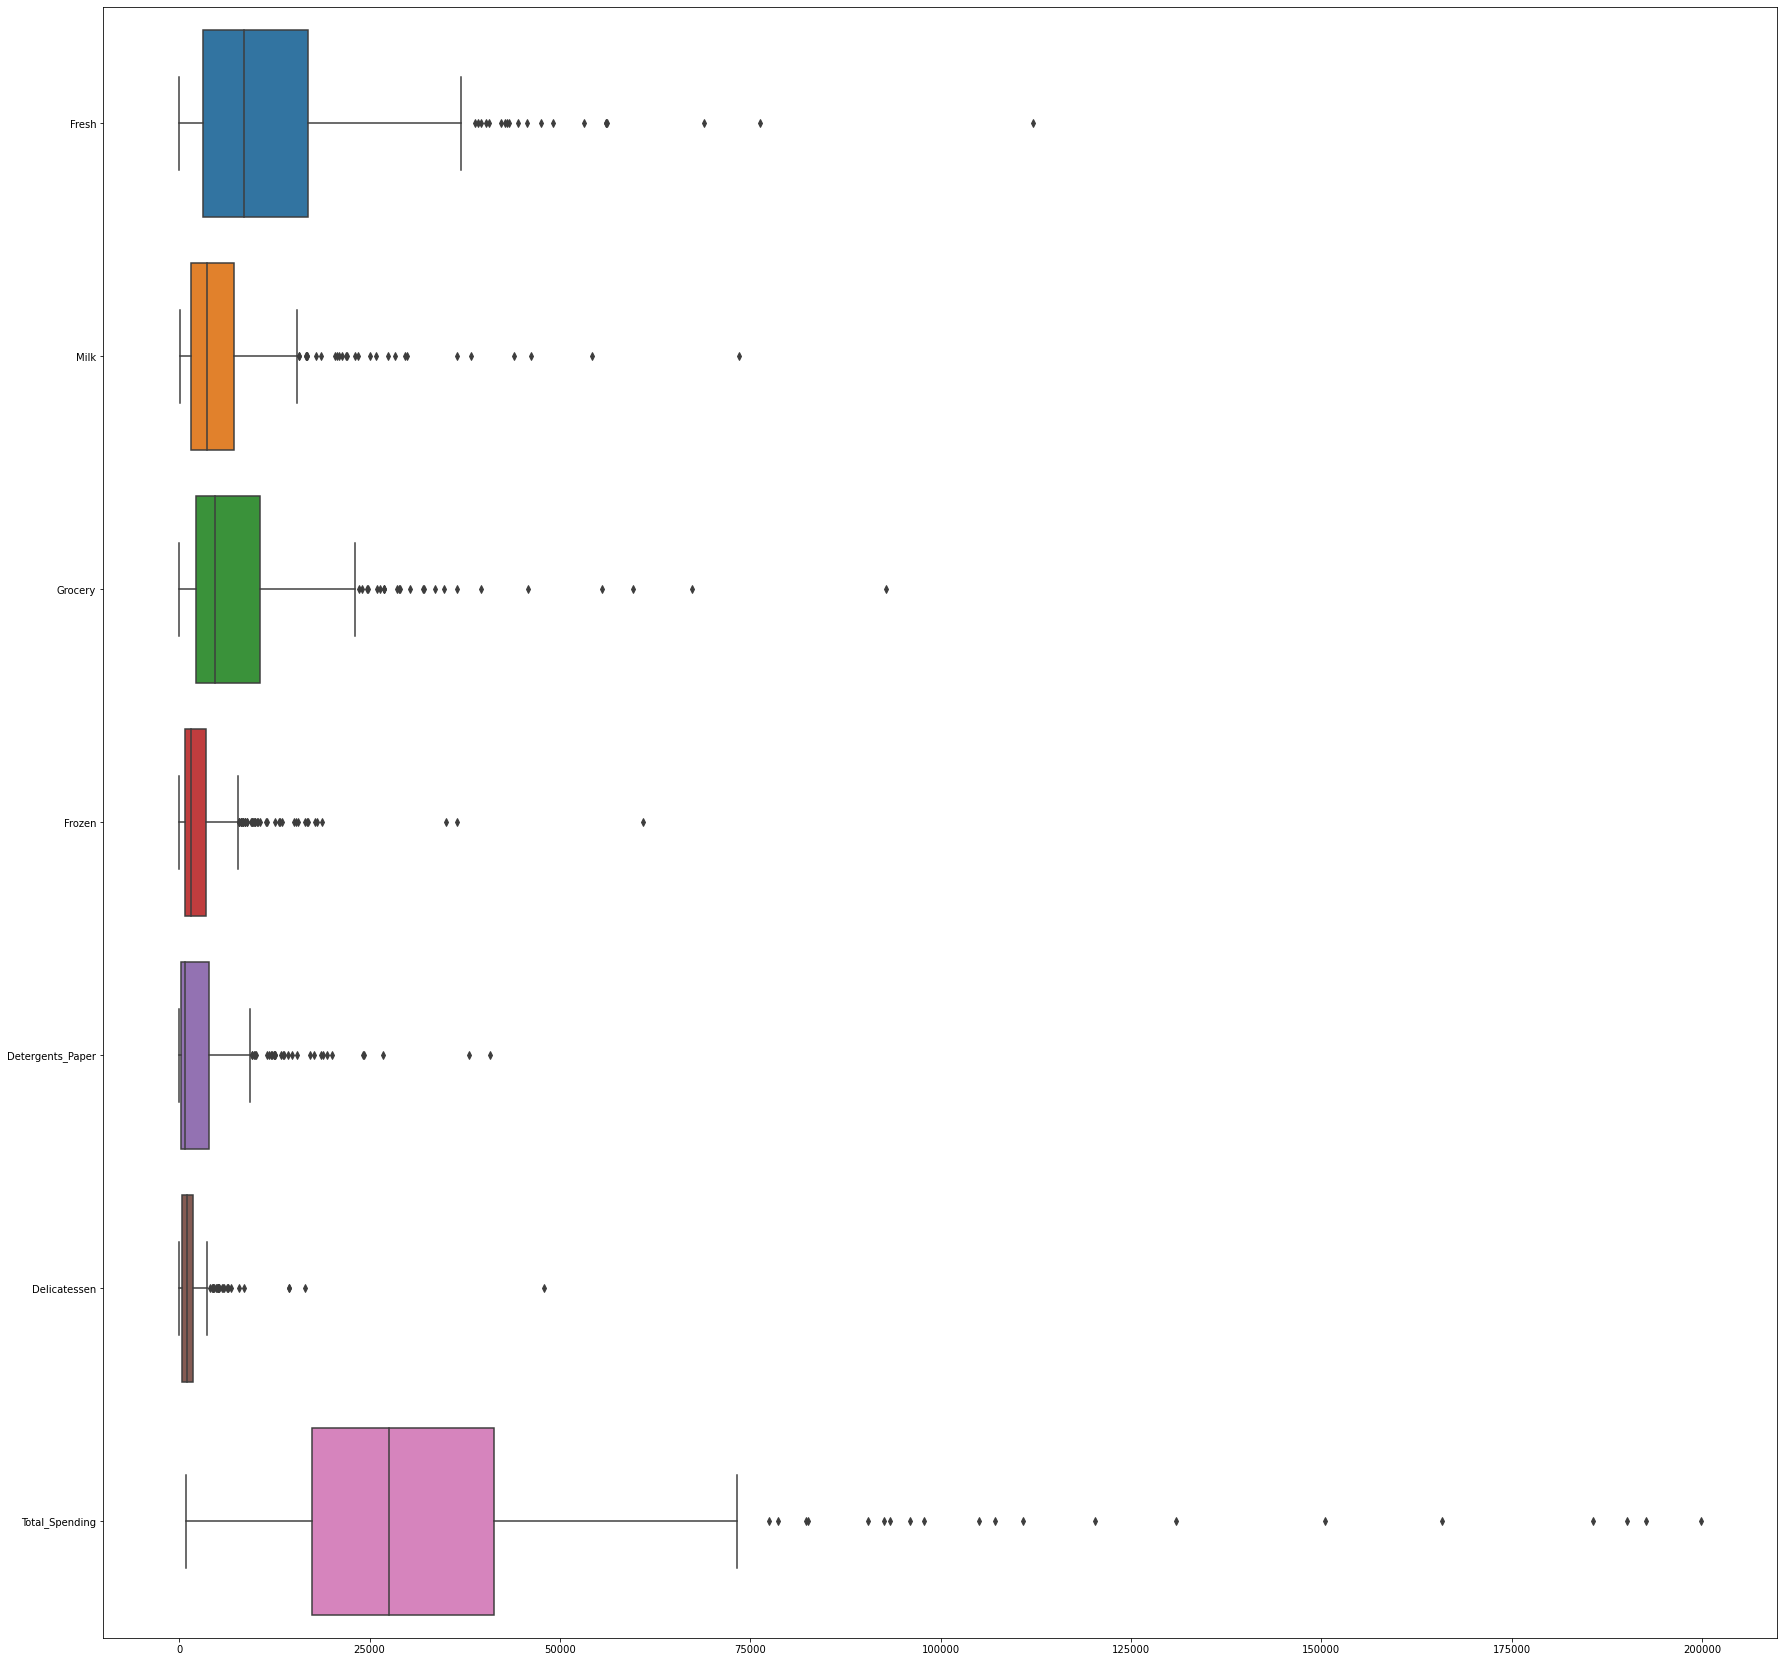

In [19]:
plt.figure(figsize=(30,30))
sns.boxplot(data=df, orient="h");

In [20]:
print("Yes there are outliers in the data.")

Yes there are outliers in the data.


## Problem 2 

In [26]:
df2= pd.read_csv("Survey-1.csv",index_col=0)
df2.head()

,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
ID,,,,,,,,,,,,,
1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100


## 2.1 For this data, construct the following contingency tables (Keep Gender as row variable)
### 2.1.1 Gender and Major

In [35]:
pd.crosstab(df2["Gender"],df2["Major"])

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


### 2.1.2 Gender and Grad Intention

In [36]:
pd.crosstab(df2["Gender"],df2["Grad Intention"])

Grad Intention,No,Undecided,Yes
Gender,,,
Female,9,13,11
Male,3,9,17


### 2.1.3 Gender and Employment 

In [38]:
pd.crosstab(df2["Gender"],df2["Employment"])

Employment,Full-Time,Part-Time,Unemployed
Gender,,,
Female,3,24,6
Male,7,19,3


### 2.1.4 Gender and Computer

In [39]:
pd.crosstab(df2["Gender"],df2["Computer"])

Computer,Desktop,Laptop,Tablet
Gender,,,
Female,2,29,2
Male,3,26,0


## 2.2 Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:
### 2.2.1 What is the probability that a randomly selected CMSU student will be male?

In [45]:
 df2["Gender"].value_counts()


Female    33
Male      29
Name: Gender, dtype: int64

In [33]:
m= 29/(29+33)
print("The probability that a randomly selected CMSU student will be male is {}".format(m))

The probability that a randomly selected CMSU student will be male is 0.46774193548387094


### 2.2.2 What is the probability that a randomly selected CMSU student will be female?

In [32]:
f= 33/(29+33)
print("The probability that a randomly selected CMSU student will be female is {}".format(f))

The probability that a randomly selected CMSU student will be female is 0.532258064516129


## 2.3 Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

### 2.3.1 Find the conditional probability of different majors among the male students in CMSU.

In [48]:
# Conditional Probability of accounting 
AM= 4/62
CAM= AM/m
print("The probability that a randomly selected CMSU student will be male majoring in accounting is {}".format(CAM))

The probability that a randomly selected CMSU student will be male majoring in accounting is 0.13793103448275862


In [49]:
#Condtional Probability of CIS
CM= 1/62
CCM= CM/m
print("The probability that a randomly selected CMSU student will be male majoring in CIS is {}".format(CCM))

The probability that a randomly selected CMSU student will be male majoring in CIS is 0.034482758620689655


In [50]:
# Conditonal Probability of Economics/ Finance
EM= 4/62
CEM= EM/m
print("The probability that a randomly selected CMSU student will be male majoring in Economics/ Finance is {}".format(CEM))

The probability that a randomly selected CMSU student will be male majoring in Economics/ Finance is 0.13793103448275862


In [51]:
# Conditional Probability of International Business 
BM= 2/62
CBM= BM/m
print("The probability that a randomly selected CMSU student will be male majoring in International Business is {}".format(CBM))

The probability that a randomly selected CMSU student will be male majoring in International Business is 0.06896551724137931


In [52]:
# Conditional Probability of Management 
MM= 6/62
CMM= MM/m
print("The probability that a randomly selected CMSU student will be male majoring in Management is {}".format(CMM))

The probability that a randomly selected CMSU student will be male majoring in Management is 0.20689655172413793


In [53]:
# Conditional Probability of Other 
OM= 4/62
COM= OM/m
print("The probability that a randomly selected CMSU student will be male majoring in other majors is {}".format(COM))

The probability that a randomly selected CMSU student will be male majoring in other majors is 0.13793103448275862


In [54]:
# Conditonal Probability of Retailing/ Marketing 
RM= 5/62
CRM= RM/m
print("The probability that a randomly selected CMSU student will be male majoring in Retailing/Marketing is {}".format(CRM))

The probability that a randomly selected CMSU student will be male majoring in Retailing/Marketing is 0.1724137931034483


In [55]:
# Conditional Probability of undecided 
UM= 3/62
CUM= UM/m
print("The probability that a randomly selected CMSU student will be male with an undecided major is {}".format(CUM))

The probability that a randomly selected CMSU student will be male with an undecided major is 0.10344827586206896


## 2.3.2 Find the conditional probability of different majors among the female students of CMSU.

In [56]:
# Conditional Probability of accounting 
AF= 3/62
CAF= AF/f
print("The probability that a randomly selected CMSU student will be female majoring in accounting is {}".format(CAF))

The probability that a randomly selected CMSU student will be female majoring in accounting is 0.09090909090909091


In [57]:
# Conditional Probability of CIS 
CF= 3/62
CCF= CF/f
print("The probability that a randomly selected CMSU student will be female majoring in CIS is {}".format(CCF))

The probability that a randomly selected CMSU student will be female majoring in CIS is 0.09090909090909091


In [58]:
# Conditional Probability of Economics/Finance  
EF= 7/62
CEF= EF/f
print("The probability that a randomly selected CMSU student will be female majoring in Economics/Finance is {}".format(CEF))

The probability that a randomly selected CMSU student will be female majoring in Economics/Finance is 0.21212121212121213


In [59]:
# Conditional Probability of International Business 
BF= 4/62
CBF= BF/f
print("The probability that a randomly selected CMSU student will be female majoring in International Business is {}".format(CBF))

The probability that a randomly selected CMSU student will be female majoring in International Business is 0.12121212121212122


In [60]:
# Conditional Probability of Management
MF= 4/62
CMF= MF/f
print("The probability that a randomly selected CMSU student will be female majoring in Management is {}".format(CMF))

The probability that a randomly selected CMSU student will be female majoring in Management is 0.12121212121212122


In [61]:
# Conditional Probability of other majors
OF= 3/62
COF= OF/f
print("The probability that a randomly selected CMSU student will be female majoring in other majors is {}".format(COF))

The probability that a randomly selected CMSU student will be female majoring in other majors is 0.09090909090909091


In [62]:
# Conditional Probability of Retailing/Marketing 
RF= 9/62
CRF= RF/f
print("The probability that a randomly selected CMSU student will be female majoring in Retailing/Marketing is {}".format(CRF))

The probability that a randomly selected CMSU student will be female majoring in Retailing/Marketing is 0.27272727272727276


In [63]:
# Conditional Probability of an undecided major 
UF= 0/62
CUF= UF/f
print("The probability that a randomly selected CMSU student will be a female with an undecided major is {}".format(CUF))

The probability that a randomly selected CMSU student will be a female with an undecided major is 0.0


## 2.4 Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following question:

### 2.4.1 Find the probability That a randomly chosen student is a male and intends to graduate.


In [79]:
MG= 17/(29+33)
print("The probability that a randomly chosen student is male and intends to graduate is {}".format(MG))

The probability that a randomly chosen student is male and intends to graduate is 0.27419354838709675


### 2.4.2 Find the probability that a randomly selected student is a female and does NOT have a laptop. 

In [81]:
FL= 4/(29+33)
print("The probability that a randomly selected student is a female and does not have a laptop is {}.".format(FL))

The probability that a randomly selected student is a female and does not have a laptop is 0.06451612903225806.


## 2.5 Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:
### 2.5.1 Find the probability that a randomly chosen student is either a male or has full-time employment?

In [82]:
df2["Employment"].value_counts()

Part-Time     43
Full-Time     10
Unemployed     9
Name: Employment, dtype: int64

In [83]:
FT= 10/33
MorFT= (m+FT)-(7/(29+33))
print("The probability that a randomly chosen student is either a male or has full-time employment is {}".format(MorFT))

The probability that a randomly chosen student is either a male or has full-time employment is 0.6578690127077224


### 2.5.2. Find the conditional probability that given a female student is randomly chosen, she is majoring in international business or management.

In [86]:
df2["Major"].value_counts()

Retailing/Marketing       14
Economics/Finance         11
Management                10
Accounting                 7
Other                      7
International Business     6
CIS                        4
Undecided                  3
Name: Major, dtype: int64

In [64]:
BorM= CBF+ CMF 
CF= BorM/ f
print("The conditional probability that given a female student is randomly chosen, she is majoring in international business or management is {}".format(CF))


The conditional probability that given a female student is randomly chosen, she is majoring in international business or management is 0.45546372819100095


## 2.6 Construct a contingency table of Gender and Intent to Graduate at 2 levels (Yes/No). The Undecided students are not considered now and the table is a 2x2 table. Do you think the graduate intention and being female are independent events?

In [90]:
pd.crosstab(df2["Gender"],df2["Grad Intention"]).drop("Undecided",axis=1)

Grad Intention,No,Yes
Gender,,
Female,9,11
Male,3,17


## 2.7 Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages.

### 2.7.1  If a student is chosen randomly, what is the probability that his/her GPA is less than 3?

In [8]:
z= df2["GPA"]<3
z.value_counts()

False    45
True     17
Name: GPA, dtype: int64

In [11]:
G= 17/(29+33)
print ("If a student is chosen randomly, the probability that his/her GPA is less than 3 is {}".format(G))

If a student is chosen randomly, the probability that his/her GPA is less than 3 is 0.27419354838709675


### 2.7.2 Find the conditional probability that a randomly selected male earns 50 or more. Find the conditional probability that a randomly selected female earns 50 or more.

In [30]:
# Probability that a randomly selected male earns 50 or more 
q=df2["Salary"]>=50
q

ID
1      True
2     False
3     False
4     False
5     False
      ...  
58    False
59    False
60     True
61    False
62     True
Name: Salary, Length: 62, dtype: bool

In [31]:
pd.crosstab(df2["Gender"],q)

Salary,False,True
Gender,,
Female,15,18
Male,15,14


In [46]:
s= 14/62
CPS=s/(29/62)
print ("The conditional probability that a randomly selected male earns 50 or more is {}".format(CPS))

The conditional probability that a randomly selected male earns 50 or more is 0.4827586206896552


In [47]:
# Probability that a randomly selected female earns 50 or more 
r= 18/62
CPR= r/(32/62)
print ("The conditional probability that a randomly selected female earns 50 or more is {}".format(CPR))

The conditional probability that a randomly selected female earns 50 or more is 0.5625


## 2.8 Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages. For each of them comment whether they follow a normal distribution. Write a note summarizing your conclusions.



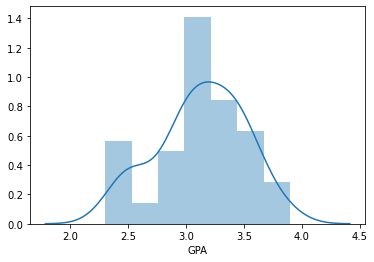

In [75]:

sns.distplot(df2["GPA"],label="GPA");


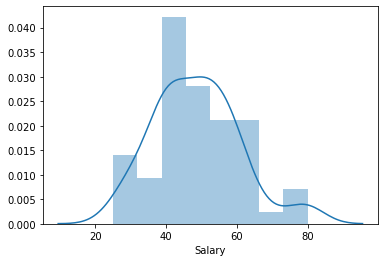

In [77]:
sns.distplot(df2["Salary"],label="Salary");

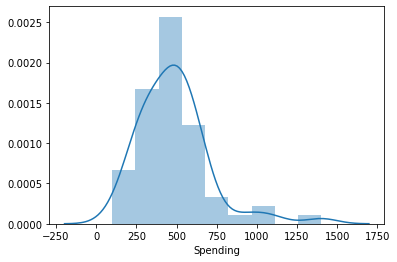

In [78]:
sns.distplot(df2["Spending"],label="Spending");

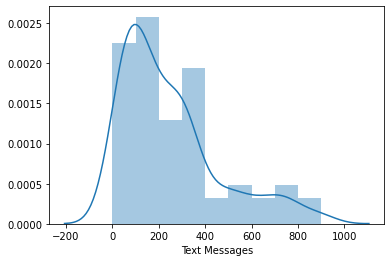

In [80]:
sns.distplot(df2["Text Messages"],label="Text Messages");

In [81]:
print("None of the variables are symmetric, hence we can assume they do not have a normal distribution.")

None of the variables are symmetric, hence we can assume they do not have a normal distribution.


## Problem 3 

In [83]:
df3=pd.read_csv("A+&+B+shingles.csv")
df3.head()

,A,B
0,0.44,0.14
1,0.61,0.15
2,0.47,0.31
3,0.30,0.16
4,0.15,0.37


## 3.1 Do you think there is evidence that mean moisture contents in both types of shingles are within the permissible limits? State your conclusions clearly showing all steps.

In [85]:
df3["A"].describe()

count    36.000000
mean      0.316667
std       0.135731
min       0.130000
25%       0.207500
50%       0.290000
75%       0.392500
max       0.720000
Name: A, dtype: float64

In [90]:
# Ho= mean<= 0.35 HA= mean>0.35 

tstatistic, p_value= ttest_1samp(df3["A"],0.316667)
p_value

0.9999883268011658

In [91]:
df3["B"].describe()

count    31.000000
mean      0.273548
std       0.137296
min       0.100000
25%       0.160000
50%       0.230000
75%       0.400000
max       0.580000
Name: B, dtype: float64

In [101]:
tstatistic, p_value= ttest_1samp(df3["B"],0.273548,nan_policy="omit")
p_value

0.9999875788408477

In [102]:
print("Since both p_values are greater than 0.95 i.e. alpha we can accept Ho that the mean is lesser than 0.35 per 100 square feet")

Since both p_values are greater than 0.95 i.e. alpha we can accept Ho that the mean is lesser than 0.35 per 100 square feet


## 3.2 Do you think that the population mean for shingles A and B are equal? Form the hypothesis and conduct the test of the hypothesis. What assumption do you need to check before the test for equality of means is performed?



In [104]:
# Ho: Mean of A-Mean of B = 0
# HA: Mean of A- mean of B is not equal to 0
tstatistic, p_value= ttest_ind(df3["A"],df3["B"],nan_policy="omit")
p_value


0.2017496571835306

In [105]:
print("As the p value is less than 0.95 we can assume that the population means are not equal")

As the p value is less than 0.95 we can assume that the population means are not equal
